# START! (Placeholder)

In [ ]:
#
# This is nathan's cell. Nathan's cell says hi.
#
print("Hello team!")

In [21]:
import pandas as pd
import seaborn as sns

## Reading in Data

In [22]:
# Reading in Defensive Data

defense_df = pd.read_csv("defense.csv")
defense_df

,Player,Team,Int,Yds,Avg,Lg,TD,Solo,Ast,Tot,Sack,YdsL,Stat Type
0,Tre Watson,MD,5,51,10.2,36t,1,70,44,114,1.0,7.0,Defense
1,Geno Stone,IOWA,4,24,6.0,24t,1,29,10,39,0.0,0.0,Defense
2,J.R. Pace,NW,4,26,6.5,26,0,51,31,82,0.0,0.0,Defense
3,Darnell Savage Jr.,MD,4,30,7.5,23t,1,38,14,52,0.0,0.0,Defense
4,Del'Shawn Phillips,ILL,4,36,9.0,34,0,45,50,95,1.5,11.0,Defense
...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,Jared McGee,NW,1,17,17.0,17,0,36,15,51,0.0,0.0,Defense
96,Lavert Hill,MICH,1,21,21.0,21t,1,10,4,14,0.0,0.0,Defense
97,Scott Nelson,WISC,1,22,22.0,22,0,22,19,41,0.0,0.0,Defense
98,Nate Hobbs,ILL,1,27,27.0,27,0,13,9,22,0.0,0.0,Defense


In [23]:
# Reading in Rushing Data

rushing_df = pd.read_csv("receiving.csv")
rushing_df

,Player,Team,Rec,Yds,Avg,Lg,TD,Stat Type
0,Rondale Moore,PUR,114,"1,258",11.04,70t,12,Receiving
1,Parris Campbell,OSU,89,985,11.07,71t,11,Receiving
2,Tyler Johnson,MINN,78,"1,169",14.99,52,12,Receiving
3,Flynn Nagel,NW,68,780,11.47,61t,2,Receiving
4,K.J. Hill,OSU,68,865,12.72,42,6,Receiving
...,...,...,...,...,...,...,...,...
95,Mike Epstein,ILL,10,86,8.60,32,0,Receiving
96,Carmoni Green,ILL,10,93,9.30,25,0,Receiving
97,LJ Scott,MSU,10,95,9.50,32,0,Receiving
98,Charlie Fessler,NW,10,101,10.10,17,0,Receiving


In [24]:
# Reading in Receiving Data

receiving_df = pd.read_csv("receiving.csv")
receiving_df

,Player,Team,Rec,Yds,Avg,Lg,TD,Stat Type
0,Rondale Moore,PUR,114,"1,258",11.04,70t,12,Receiving
1,Parris Campbell,OSU,89,985,11.07,71t,11,Receiving
2,Tyler Johnson,MINN,78,"1,169",14.99,52,12,Receiving
3,Flynn Nagel,NW,68,780,11.47,61t,2,Receiving
4,K.J. Hill,OSU,68,865,12.72,42,6,Receiving
...,...,...,...,...,...,...,...,...
95,Mike Epstein,ILL,10,86,8.60,32,0,Receiving
96,Carmoni Green,ILL,10,93,9.30,25,0,Receiving
97,LJ Scott,MSU,10,95,9.50,32,0,Receiving
98,Charlie Fessler,NW,10,101,10.10,17,0,Receiving


<bound method Grid.add_legend of <seaborn.axisgrid.PairGrid object at 0x1274ccaf0>>

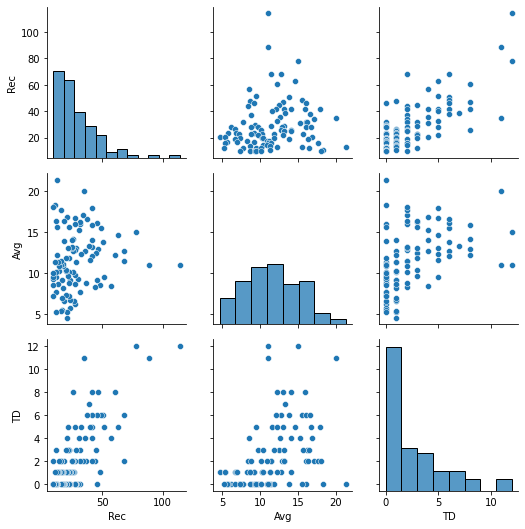

In [26]:
# Why in the world is Yds not here??? 

g = sns.PairGrid(receiving_df)
g.map_diag(sns.histplot)
g.map_offdiag(sns.scatterplot)
g.add_legend

